To predict how many points NBA players scored in 2013-1014 season

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/nba_2013.csv')

In [3]:
df = data.copy()

In [4]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [5]:
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [6]:
df.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [7]:
df.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

## KNN imputer

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan) #missing_values`should be set to np.nan, since `pd.NA` will be converted to np.nan.

In [10]:
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [11]:
df[df.dtypes[df.dtypes == 'object'].index]

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014
...,...,...,...,...
476,Tony Wroten,SG,PHI,2013-2014
477,Nick Young,SG,LAL,2013-2014
478,Thaddeus Young,PF,PHI,2013-2014
479,Cody Zeller,C,CHA,2013-2014


In [12]:
df = df.drop('player',axis=1)

In [13]:
df = df.drop('season',axis=1)

In [14]:
df = df.drop('bref_team_id',axis=1)

In [15]:
df = df.drop('season_end',axis=1)

In [16]:
df['pos'].unique() # position of player

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [17]:
encoded = pd.get_dummies(df['pos'],drop_first=True)

In [18]:
df = df.drop('pos',axis=1)

In [19]:
encoded

,F,G,PF,PG,SF,SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
476,0,0,0,0,0,1
477,0,0,0,0,0,1
478,0,0,1,0,0,0
479,0,0,0,0,0,0


In [20]:
df[['F','G','PF','PG','SF','SG']] = encoded

In [21]:
df

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,F,G,PF,PG,SF,SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,NaN,...,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,328,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,0.427,40,188,0.212766,...,16,204,151,939,0,0,0,0,0,1
477,28,64,9,1810,387,889,0.435,135,350,0.385714,...,12,95,156,1144,0,0,0,0,0,1
478,25,79,78,2718,582,1283,0.454,90,292,0.308219,...,36,165,213,1417,0,0,1,0,0,0
479,21,82,3,1416,172,404,0.426,0,1,0.000000,...,41,87,170,490,0,0,0,0,0,0


In [22]:
new_array = imputer.fit_transform(df)

In [23]:
new_df = pd.DataFrame(data=new_array,columns = df.columns)

In [24]:
new_df

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,F,G,PF,PG,SF,SG
0,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.266667,...,26.0,30.0,122.0,171.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,0.0,0.078431,...,57.0,71.0,203.0,265.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.0,53.0,12.0,961.0,143.0,275.0,0.520,0.0,0.0,0.000000,...,36.0,39.0,108.0,362.0,0.0,0.0,1.0,0.0,0.0,0.0
3,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.426667,...,3.0,146.0,136.0,1330.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25.0,56.0,30.0,951.0,136.0,249.0,0.546,0.0,1.0,0.000000,...,46.0,63.0,187.0,328.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20.0,72.0,16.0,1765.0,345.0,808.0,0.427,40.0,188.0,0.212766,...,16.0,204.0,151.0,939.0,0.0,0.0,0.0,0.0,0.0,1.0
477,28.0,64.0,9.0,1810.0,387.0,889.0,0.435,135.0,350.0,0.385714,...,12.0,95.0,156.0,1144.0,0.0,0.0,0.0,0.0,0.0,1.0
478,25.0,79.0,78.0,2718.0,582.0,1283.0,0.454,90.0,292.0,0.308219,...,36.0,165.0,213.0,1417.0,0.0,0.0,1.0,0.0,0.0,0.0
479,21.0,82.0,3.0,1416.0,172.0,404.0,0.426,0.0,1.0,0.000000,...,41.0,87.0,170.0,490.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
corr = new_df.corr()

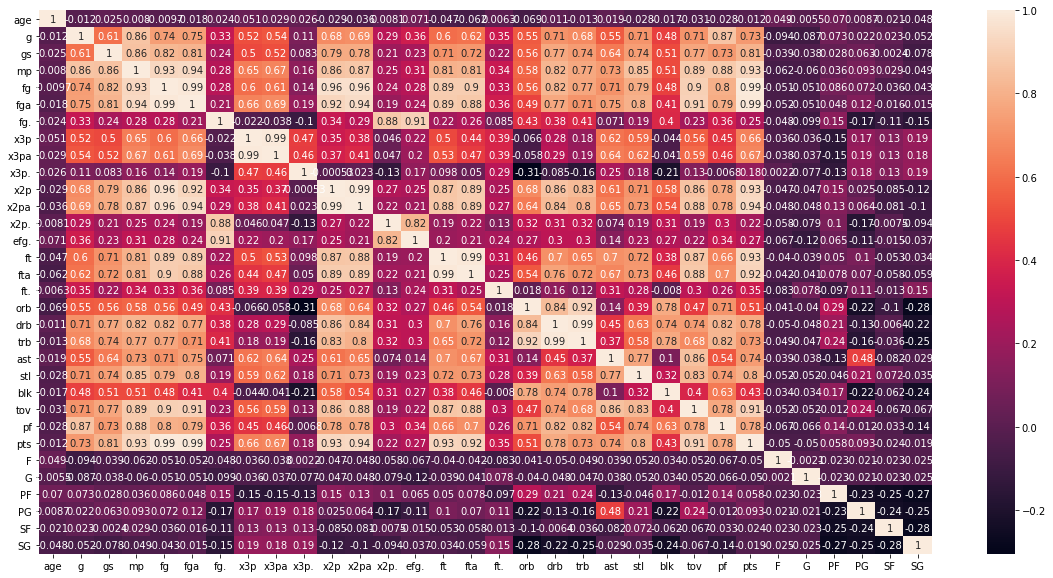

In [26]:
plt.figure(figsize = [20,10])
sns.heatmap(corr,annot = True)

## Variance infalation factor - Removing multicollinear columns

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
X = new_df.drop('pts',axis=1)
y = new_df['pts']

In [29]:
X_scaled = np.array(X)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

D:\ANACONDA\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,24.295568,age
1,43.728886,g
2,10.800002,gs
3,130.668279,mp
4,inf,fg
5,inf,fga
6,482.600293,fg.
7,inf,x3p
8,inf,x3pa
9,7.745037,x3p.


In [30]:
vif[vif['vif']>5]

,vif,Features
0,24.295568,age
1,43.728886,g
2,10.800002,gs
3,130.668279,mp
4,inf,fg
5,inf,fga
6,482.600293,fg.
7,inf,x3p
8,inf,x3pa
9,7.745037,x3p.


so these variables are multicollinear with each other so we drop one and check remaining we dont drop all of them once we check one by one as 2 features are having multicollinear we should drop one but not both like if education num is collinear with education_11th then we drop any one but not both

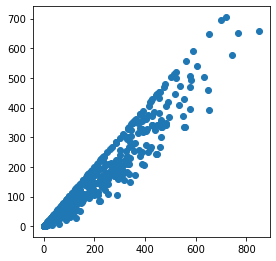

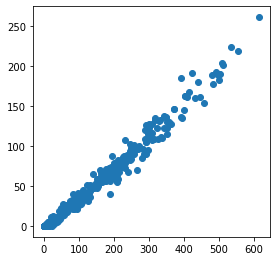

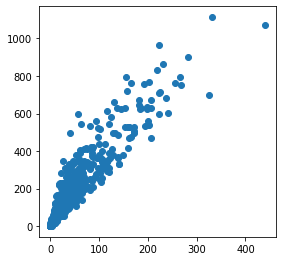

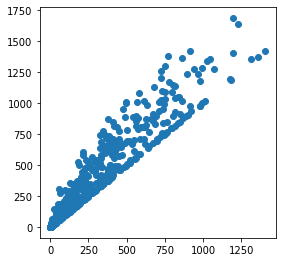

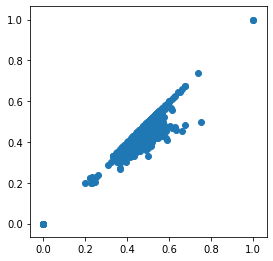

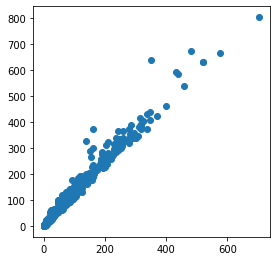

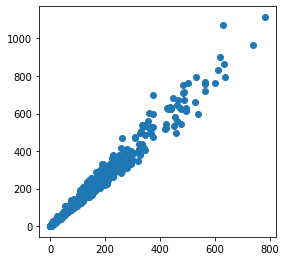

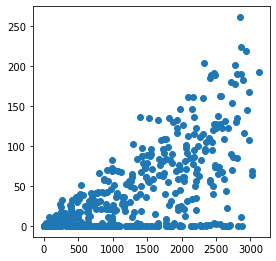

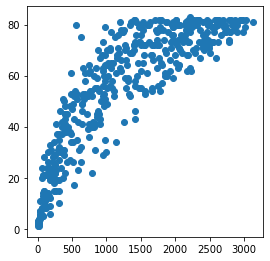

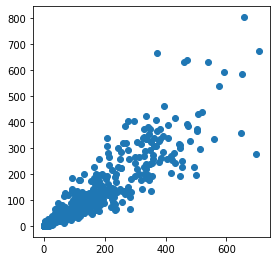

In [31]:
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 1)
plt.scatter(X['fg'],X['x2p'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 2)
plt.scatter(X['x3pa'],X['x3p'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 3)
plt.scatter(X['orb'],X['trb'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 4)
plt.scatter(X['x2pa'],X['fga'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 5)
plt.scatter(X['efg.'],X['fg.'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 6)
plt.scatter(X['ft'],X['fta'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 7)
plt.scatter(X['drb'],X['trb'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 8)
plt.scatter(X['mp'],X['x3p'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 9)
plt.scatter(X['mp'],X['g'])
plt.figure(figsize=(50,50))
plt.subplot(10, 10, 10)
plt.scatter(X['x2p'],X['fta'])

there is a relation between these features so we can drop any one of them in each pair

In [32]:
X.drop('fg',axis=1,inplace=True)
X.drop('x3pa',axis=1,inplace=True)
X.drop('orb',axis=1,inplace=True)
X.drop('x2pa',axis=1,inplace=True)
X.drop('efg.',axis=1,inplace=True)
X.drop('ft',axis=1,inplace=True)
X.drop('drb',axis=1,inplace=True)
X.drop('mp',axis=1,inplace=True)
X.drop('x2p',axis=1,inplace=True)

In [33]:
X_scaled = np.array(X)
new_data_X = pd.DataFrame(X_scaled,columns = X.columns)

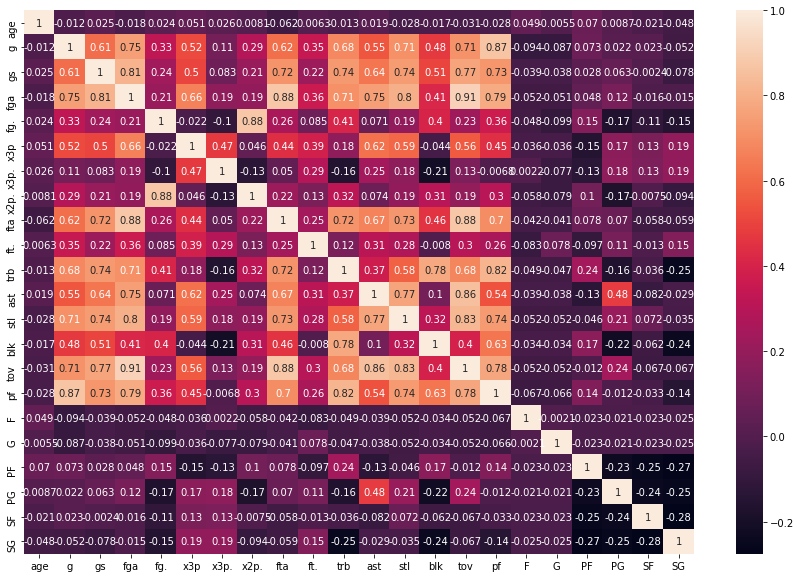

In [34]:
corr = new_data_X.corr()
plt.figure(figsize = [15,10])
sns.heatmap(corr,annot = True)

In [35]:
new_data_X.head()

,age,g,gs,fga,fg.,x3p,x3p.,x2p.,fta,ft.,...,stl,blk,tov,pf,F,G,PF,PG,SF,SG
0,23.0,63.0,0.0,141.0,0.468,4.0,0.266667,0.492063,53.0,0.660,...,23.0,26.0,30.0,122.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,20.0,185.0,0.503,0.0,0.078431,0.502703,136.0,0.581,...,40.0,57.0,71.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.0,53.0,12.0,275.0,0.520,0.0,0.000000,0.520000,119.0,0.639,...,24.0,36.0,39.0,108.0,0.0,0.0,1.0,0.0,0.0,0.0
3,28.0,73.0,73.0,1011.0,0.459,128.0,0.426667,0.472574,336.0,0.815,...,35.0,3.0,146.0,136.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25.0,56.0,30.0,249.0,0.546,0.0,0.000000,0.548387,67.0,0.836,...,23.0,46.0,63.0,187.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_data_X, y,test_size = 0.25,random_state = 0)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn_reg = KNeighborsRegressor()

In [39]:
knn_reg.fit(X_train,y_train)

KNeighborsRegressor()

In [40]:
y_pred = knn_reg.predict(X_test)

In [41]:
knn_reg.score(X_test,y_test)

0.979195908274813

In [42]:
knn_reg.score(X_train,y_train)

0.9841343808502744

In [43]:
from sklearn.model_selection import KFold
Kfold = KFold(n_splits=10)
Kfold.get_n_splits(X)

10

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from statistics import mean
knn = KNeighborsRegressor(algorithm = 'auto', leaf_size=18, n_neighbors = 11)
cnt = 0
count = []
train_score = []
test_score = []

for train_index, test_index in Kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ = knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))



for k =  1
train_score is :   0.9793283828163073 and test score is :   0.979896099908425
for k =  2
train_score is :   0.9811027139845301 and test score is :   0.9796787085345687
for k =  3
train_score is :   0.9807307535220379 and test score is :   0.9455653323326514
for k =  4
train_score is :   0.9762783125766277 and test score is :   0.9837861351997227
for k =  5
train_score is :   0.9800876987106989 and test score is :   0.97273723510157
for k =  6
train_score is :   0.9785570413400385 and test score is :   0.9835218970180016
for k =  7
train_score is :   0.9807016969143743 and test score is :   0.97710170496077
for k =  8
train_score is :   0.9810077541507799 and test score is :   0.9761956405382095
for k =  9
train_score is :   0.981632183641656 and test score is :   0.9876942782570184
for k =  10
train_score is :   0.9807958842745085 and test score is :   0.9889722430807222
************************************************
************************************************
Average